In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import binom

Function to compute the p-value and return the significance stars

In [2]:
def get_sig_label(a, b, p):
    pval = binom.sf(a - 1, b, p)
    if pval <= 0.001:
        return '***'
    elif pval <= 0.01:
        return '**'
    elif pval <= 0.05:
        return '*'
    else:
        return 'ns'

# Empirical analysis

# (A) BBM dataset

In [3]:
df_theo =pd.read_csv('../input/Expected_fraction_data_EF.tsv', sep = '\t')
df_BBM = pd.read_csv('../input/Empirical_dataset/BBM_reference_data_for_thf_study.tsv', sep = '\t')

EThF_theo=list(df_theo['EThF'])
theor_frac_ising_in_EThF= list(df_theo['frac_eff_ising_in_EThF'])
theor_frac_bit_in_EThF=list(df_theo['frac_eff_bit_based_in_EThF'])
theor_frac_non_NCF_bit_in_EThF = list(df_theo['frac_non_NCF_bit_in_EThF'])
theor_frac_NCF_in_EthF=list(df_theo['frac_NCF_in_EThF'])
theor_frac_non_bit_NCF_in_EThF = list(df_theo['frac_non_bit_NCF_in_EThF'])
theor_frac_NCF_intersect_bit_in_EThF = list(df_theo['frac_NCF_intersect_bit_in_EThF'])

K = list(df_BBM['k'])
inputs=list(set(K))
EThF=list(df_BBM['EThF'])
ising=list(df_BBM['ising'])
bit_based=list(df_BBM['bit_based'])
NCF=list(df_BBM['NCF'])


freq=[K[i]for i in range(len(K))]
freq_EthF=[K[i]for i in range(len(K)) if EThF[i]]
freq_ising = [K[i]for i in range(len(K)) if ising[i]]
freq_bit = [K[i]for i in range(len(K)) if bit_based[i]]
freq_non_NCF_bit = [K[i]for i in range(len(K)) if bit_based[i] and not NCF[i]]
freq_non_bit_NCF = [K[i]for i in range(len(K)) if NCF[i] and not bit_based[i]]
freq_bit_NCF = [K[i]for i in range(len(K)) if NCF[i] and bit_based[i]]
freq_NCF = [K[i]for i in range(len(K)) if NCF[i]==True]

count=[freq.count(i) for i in inputs]
count_EThF = [freq_EthF.count(i) for i in inputs] 
count_ising = [freq_ising.count(i) for i in inputs]
count_bit = [freq_bit.count(i) for i in inputs]
count_NCF = [freq_NCF.count(i) for i in inputs]
count_non_NCF_bit = [freq_non_NCF_bit.count(i) for i in inputs]
count_non_bit_NCF = [freq_non_bit_NCF.count(i) for i in inputs]
count_bit_intersect_NCF = [freq_bit_NCF.count(i) for i in inputs]


frac_EThF_theor=[EThF_theo[i]/2**(2**(i+1)) for i in range(len(EThF_theo))]
frac_EThF_emp=[count_EThF[i]/count[i] for i in range(len(count_EThF))]

y=count_EThF
x=count_ising
z=count_bit
w=count_NCF
q = count_non_NCF_bit
s = count_non_bit_NCF
u = count_bit_intersect_NCF


frac_NCF_in_EThF=[w[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]
frac_ising_in_EThF=[x[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]
frac_bit_in_EThF=[z[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]
frac_non_NCF_bit_in_EThF=[q[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]
frac_non_bit_NCF_in_EThF=[s[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]
frac_bit_intersect_NCF_in_EThF = [u[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]

Generating the empirical data file for BBM dataset

In [4]:
def emp_num_frac_BBM():
    empirical_data_file = {'k':inputs, 'All': count, 'EThF': count_EThF, 'NCF': count_NCF, 'ising': count_ising, 'bit': count_bit, 
                          'non_NCF_bit': count_non_NCF_bit, 'non_bit_NCF': count_non_bit_NCF, 'bit_intersect_NCF': count_bit_intersect_NCF,
                          'NCF_frac_in_EThF': frac_NCF_in_EThF, 'ising_frac_in_EThF': frac_ising_in_EThF,'bit_frac_in_EThF': frac_bit_in_EThF, 
                          'non_NCF_bit_frac_in_EThF': frac_non_NCF_bit_in_EThF,'non_bit_NCF_frac_in_EThF': frac_non_bit_NCF_in_EThF, 
                          'bit_intersect_NCF_frac_in_EThF': frac_bit_intersect_NCF_in_EThF}
 
    df = pd.DataFrame(empirical_data_file)
    df.to_csv('../output/empirical_fraction_data_BBM.tsv', sep = '\t')
    return df

A = emp_num_frac_BBM()

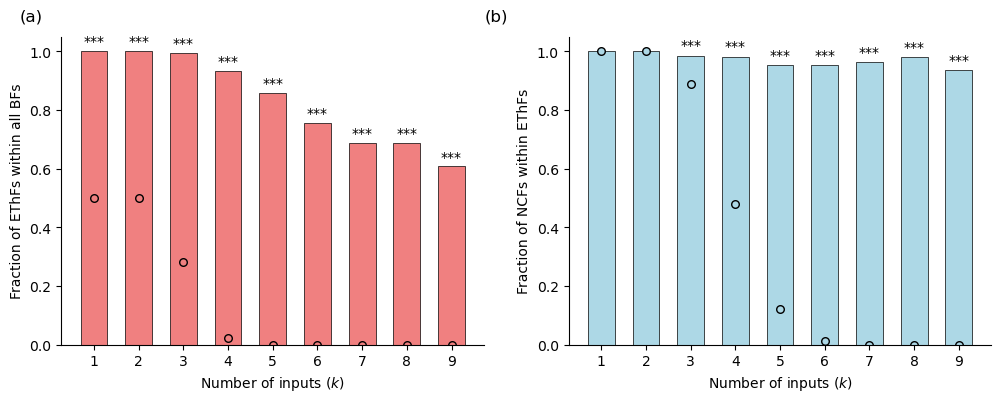

In [5]:
#------------------------------------------------------------------------------------------------------------------
# Plotting enrichment of EThFs in the BBM dataset
#------------------------------------------------------------------------------------------------------------------
df_theo = pd.read_csv('../input/Expected_fraction_data_EF.tsv', sep = '\t')
df_empir = pd.read_csv("../output/empirical_fraction_data_BBM.tsv", sep="\t")
inputs = df_theo['Input'].tolist()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

## Left subplot
ax[0].bar(inputs, frac_EThF_emp, color='lightcoral', label='Empirical', edgecolor='black', linewidth=0.5, width=0.6)
ax[0].scatter(inputs, frac_EThF_theor, s=30, c='lightcoral', edgecolors='black',label='Theoretical')
ax[0].set_xlabel('Number of inputs ' r'$(k)$')
ax[0].set_ylabel('Fraction of EThFs within all BFs')
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set_xticks(inputs)
ax[0].text(-0.1, 1.05, '(a)', transform=ax[0].transAxes, fontsize=12)

for k in inputs:
    a = df_empir.loc[df_empir['k']==k, 'EThF'].values[0]
    b = df_empir.loc[df_empir['k']==k, 'All'].values[0]
    p = (df_theo.loc[df_theo['Input']==k, 'EThF'].values[0])/(2**(2**k))
    label = get_sig_label(a, b, p)
    ax[0].text(k, max(a/b,p)*1.01, label, ha='center', va='bottom', fontsize=10)

# Right subplot
ax[1].bar(inputs, frac_NCF_in_EThF, color='lightblue', edgecolor='black', linewidth=0.5, width=0.6)
ax[1].scatter(inputs, theor_frac_NCF_in_EthF, s=30, c='lightblue', edgecolors='black')
ax[1].set_xlabel('Number of inputs ' r'$(k)$')
ax[1].set_ylabel('Fraction of NCFs within EThFs')
ax[1].spines[['right', 'top']].set_visible(False)
ax[1].set_xticks(inputs)
ax[1].text(1, 1.05, '(b)', transform=ax[0].transAxes, fontsize=12)

for k in inputs:
    a = df_empir.loc[df_empir['k']==k, 'NCF'].values[0]
    b = df_empir.loc[df_empir['k']==k, 'EThF'].values[0]
    p = df_theo.loc[df_theo['Input']==k, 'frac_NCF_in_EThF'].values[0]
    label = get_sig_label(a, b, p)
    if k not in [1,2]:
        ax[1].text(k, max(a/b,p)*1.01, label, ha='center', va='bottom', fontsize=10)
        
plt.show()

Text(-0.1, -0.2, '(d)')

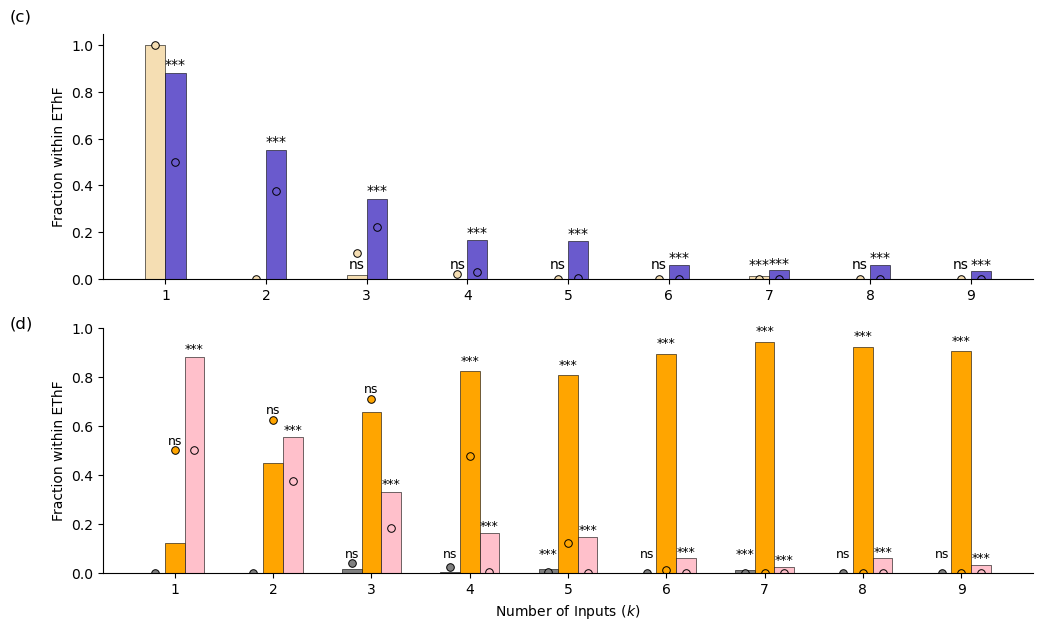

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(12, 7))
j=np.arange(1,10)
width=0.20

ax[0].bar(j-0.10,frac_ising_in_EThF[0:10],width,color='wheat',label=r'$IMR$',edgecolor='black',linewidth=0.4)
ax[0].scatter(j-0.10,theor_frac_ising_in_EThF[0:10],s=30, c='wheat',edgecolors='black',linewidths=0.7)

ax[0].bar(j+0.10,frac_bit_in_EThF[0:10],width,color='slateblue',label=r'$BMR$',edgecolor='black',linewidth=0.4)
ax[0].scatter(j+0.10,theor_frac_bit_in_EThF[0:10],s=30, c='slateblue',edgecolors='black',linewidths=0.7)

for k in j:
    a1 = df_empir.loc[df_empir['k']==k, 'ising'].values[0]
    b = df_empir.loc[df_empir['k']==k, 'EThF'].values[0]
    p1 = df_theo.loc[df_theo['Input']==k, 'frac_eff_ising_in_EThF'].values[0]
    a2 = df_empir.loc[df_empir['k']==k, 'bit'].values[0]
    p2 = df_theo.loc[df_theo['Input']==k, 'frac_eff_bit_based_in_EThF'].values[0]
    if k not in [1,2]:
        label1 = get_sig_label(a1, b, p1)
        ax[0].text(k - 0.10, 0.03, label1, ha='center', va='bottom', fontsize=10)
        
    label2 = get_sig_label(a2, b, p2)
    ax[0].text(k +0.10, max(a2/b, p2)*1.01, label2, ha='center', va='bottom', fontsize=10)


ax[0].set_xticks(np.arange(1,10))
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set_ylabel('Fraction within EThF')
ax[0].text(-0.1, 1.05, '(c)', transform=ax[0].transAxes, fontsize=12)


width_2 = 0.20
ax[1].bar(j-width_2,frac_non_NCF_bit_in_EThF[0:10],width_2,color='grey',label=r'$non-NCF ~BMRs$',edgecolor='black',linewidth=0.4)
ax[1].scatter(j-width_2,theor_frac_non_NCF_bit_in_EThF[0:10],s=30, c='grey',edgecolors='black',linewidths=0.7)

ax[1].bar(j,frac_non_bit_NCF_in_EThF[0:10],width_2,color='orange',label=r'$non-BMR ~NCFs$',edgecolor='black',linewidth=0.4)
ax[1].scatter(j,theor_frac_non_bit_NCF_in_EThF[0:10],s=30, c='orange',edgecolors='black',linewidths=0.7)

ax[1].bar(j+width_2,frac_bit_intersect_NCF_in_EThF[0:10],width_2,color='pink',label=r'$NCF-BMRs$',edgecolor='black',linewidth=0.4)
ax[1].scatter(j+width_2,theor_frac_NCF_intersect_bit_in_EThF[0:10],s=30, c='pink',edgecolors='black',linewidths=0.7)


for k in j:
    a1 = df_empir.loc[df_empir['k']==k, 'non_NCF_bit'].values[0]
    a2 = df_empir.loc[df_empir['k']==k, 'non_bit_NCF'].values[0]
    a3 = df_empir.loc[df_empir['k']==k, 'bit_intersect_NCF'].values[0]
    b = df_empir.loc[df_empir['k']==k, 'EThF'].values[0]
    p1 = df_theo.loc[df_theo['Input']==k, 'frac_non_NCF_bit_in_EThF'].values[0]
    p2 = df_theo.loc[df_theo['Input']==k, 'frac_non_bit_NCF_in_EThF'].values[0]
    p3 = df_theo.loc[df_theo['Input']==k, 'frac_NCF_intersect_bit_in_EThF'].values[0]
    
    if k not in [1,2]:
        label1 = get_sig_label(a1, b, p1)
        ax[1].text(k - width_2, 0.05, label1, ha='center', va='bottom', fontsize=9)
    label2 = get_sig_label(a2, b, p2)
    ax[1].text(k, max(a2/b, p2)*1.02, label2, ha='center', va='bottom', fontsize=9)
    label3 = get_sig_label(a3, b, p3)
    ax[1].text(k+width_2, max(a3/b, p3)*1.01, label3, ha='center', va='bottom', fontsize=9)
    
ax[1].set_xticks(np.arange(1,10))
ax[1].spines[['right', 'top']].set_visible(False)
ax[1].set_ylabel('Fraction within EThF')
ax[1].set_xticks(np.arange(1,10))
ax[1].set_xlabel('Number of Inputs 'r'$(k)$')
ax[1].set_ylim(0, 1)
ax[1].text(-0.1, -0.2, '(d)', transform=ax[0].transAxes, fontsize=12)

# (b) MCBF dataset

In [7]:
df_theo =pd.read_csv('../input/Expected_fraction_data_EF.tsv', sep = '\t')
df_BBM = pd.read_csv('../input/Empirical_dataset/MCBF_reference_data_for_thf_study.tsv', sep = '\t')

EThF_theo=list(df_theo['EThF'])
theor_frac_ising_in_EThF= list(df_theo['frac_eff_ising_in_EThF'])
theor_frac_bit_in_EThF=list(df_theo['frac_eff_bit_based_in_EThF'])
theor_frac_non_NCF_bit_in_EThF = list(df_theo['frac_non_NCF_bit_in_EThF'])
theor_frac_NCF_in_EthF=list(df_theo['frac_NCF_in_EThF'])
theor_frac_non_bit_NCF_in_EThF = list(df_theo['frac_non_bit_NCF_in_EThF'])
theor_frac_NCF_intersect_bit_in_EThF = list(df_theo['frac_NCF_intersect_bit_in_EThF'])

K = list(df_BBM['k'])
inputs=list(set(K))
EThF=list(df_BBM['EThF'])
ising=list(df_BBM['ising'])
bit_based=list(df_BBM['bit_based'])
NCF=list(df_BBM['NCF'])


freq=[K[i]for i in range(len(K))]
freq_EthF=[K[i]for i in range(len(K)) if EThF[i]]
freq_ising = [K[i]for i in range(len(K)) if ising[i]]
freq_bit = [K[i]for i in range(len(K)) if bit_based[i]]
freq_non_NCF_bit = [K[i]for i in range(len(K)) if bit_based[i] and not NCF[i]]
freq_non_bit_NCF = [K[i]for i in range(len(K)) if NCF[i] and not bit_based[i]]
freq_bit_NCF = [K[i]for i in range(len(K)) if NCF[i] and bit_based[i]]
freq_NCF = [K[i]for i in range(len(K)) if NCF[i]==True]

count=[freq.count(i) for i in inputs]
count_EThF = [freq_EthF.count(i) for i in inputs] 
count_ising = [freq_ising.count(i) for i in inputs]
count_bit = [freq_bit.count(i) for i in inputs]
count_NCF = [freq_NCF.count(i) for i in inputs]
count_non_NCF_bit = [freq_non_NCF_bit.count(i) for i in inputs]
count_non_bit_NCF = [freq_non_bit_NCF.count(i) for i in inputs]
count_bit_intersect_NCF = [freq_bit_NCF.count(i) for i in inputs]


frac_EThF_theor=[EThF_theo[i]/2**(2**(i+1)) for i in range(len(EThF_theo))]
frac_EThF_emp=[count_EThF[i]/count[i] for i in range(len(count_EThF))]

y=count_EThF
x=count_ising
z=count_bit
w=count_NCF
q = count_non_NCF_bit
s = count_non_bit_NCF
u = count_bit_intersect_NCF


frac_NCF_in_EThF=[w[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]
frac_ising_in_EThF=[x[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]
frac_bit_in_EThF=[z[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]
frac_non_NCF_bit_in_EThF=[q[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]
frac_non_bit_NCF_in_EThF=[s[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]
frac_bit_intersect_NCF_in_EThF = [u[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]

Generating the empirical data file for BBM dataset

In [8]:
def emp_num_frac_MCBF():
    empirical_data_file = {'k':inputs, 'All': count, 'EThF': count_EThF, 'NCF': count_NCF, 'ising': count_ising, 'bit': count_bit, 
                          'non_NCF_bit': count_non_NCF_bit, 'non_bit_NCF': count_non_bit_NCF, 'bit_intersect_NCF': count_bit_intersect_NCF,
                          'NCF_frac_in_EThF': frac_NCF_in_EThF, 'ising_frac_in_EThF': frac_ising_in_EThF,'bit_frac_in_EThF': frac_bit_in_EThF, 
                          'non_NCF_bit_frac_in_EThF': frac_non_NCF_bit_in_EThF,'non_bit_NCF_frac_in_EThF': frac_non_bit_NCF_in_EThF, 
                          'bit_intersect_NCF_frac_in_EThF': frac_bit_intersect_NCF_in_EThF}
 
    df = pd.DataFrame(empirical_data_file)
    df.to_csv('../output/empirical_fraction_data_MCBF.tsv', sep = '\t')
    return df

A = emp_num_frac_MCBF()

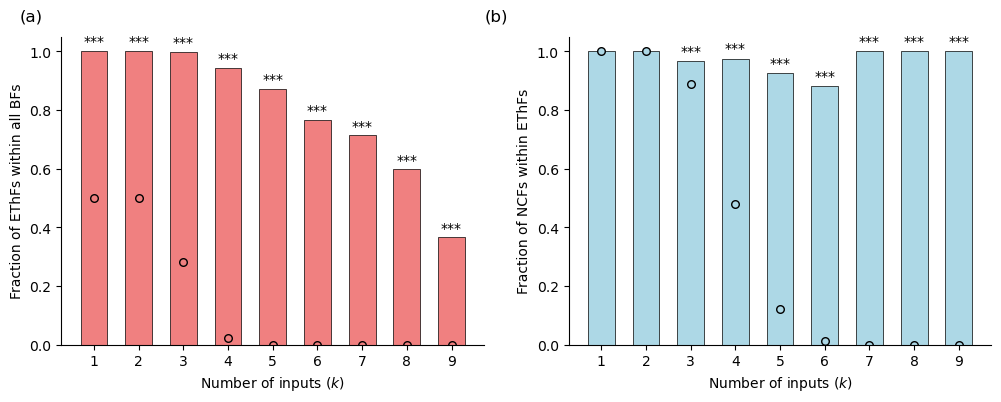

In [9]:
#------------------------------------------------------------------------------------------------------------------
# Plotting enrichment of EThFs in the MCBF dataset
#------------------------------------------------------------------------------------------------------------------
df_theo = pd.read_csv('../input/Expected_fraction_data_EF.tsv', sep = '\t')
df_empir = pd.read_csv("../output/empirical_fraction_data_MCBF.tsv", sep="\t")
inputs = df_theo['Input'].tolist()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

## Left subplot
ax[0].bar(inputs, frac_EThF_emp, color='lightcoral', label='Empirical', edgecolor='black', linewidth=0.5, width=0.6)
ax[0].scatter(inputs, frac_EThF_theor, s=30, c='lightcoral', edgecolors='black',label='Theoretical')
ax[0].set_xlabel('Number of inputs ' r'$(k)$')
ax[0].set_ylabel('Fraction of EThFs within all BFs')
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set_xticks(inputs)
ax[0].text(-0.1, 1.05, '(a)', transform=ax[0].transAxes, fontsize=12)

for k in inputs:
    a = df_empir.loc[df_empir['k']==k, 'EThF'].values[0]
    b = df_empir.loc[df_empir['k']==k, 'All'].values[0]
    p = (df_theo.loc[df_theo['Input']==k, 'EThF'].values[0])/(2**(2**k))
    label = get_sig_label(a, b, p)
    ax[0].text(k, max(a/b,p)*1.01, label, ha='center', va='bottom', fontsize=10)

# Right subplot
ax[1].bar(inputs, frac_NCF_in_EThF, color='lightblue', edgecolor='black', linewidth=0.5, width=0.6)
ax[1].scatter(inputs, theor_frac_NCF_in_EthF, s=30, c='lightblue', edgecolors='black')
ax[1].set_xlabel('Number of inputs ' r'$(k)$')
ax[1].set_ylabel('Fraction of NCFs within EThFs')
ax[1].spines[['right', 'top']].set_visible(False)
ax[1].set_xticks(inputs)
ax[1].text(1, 1.05, '(b)', transform=ax[0].transAxes, fontsize=12)

for k in inputs:
    a = df_empir.loc[df_empir['k']==k, 'NCF'].values[0]
    b = df_empir.loc[df_empir['k']==k, 'EThF'].values[0]
    p = df_theo.loc[df_theo['Input']==k, 'frac_NCF_in_EThF'].values[0]
    label = get_sig_label(a, b, p)
    if k not in [1,2]:
        ax[1].text(k, max(a/b,p)*1.01, label, ha='center', va='bottom', fontsize=10)
        
plt.show()

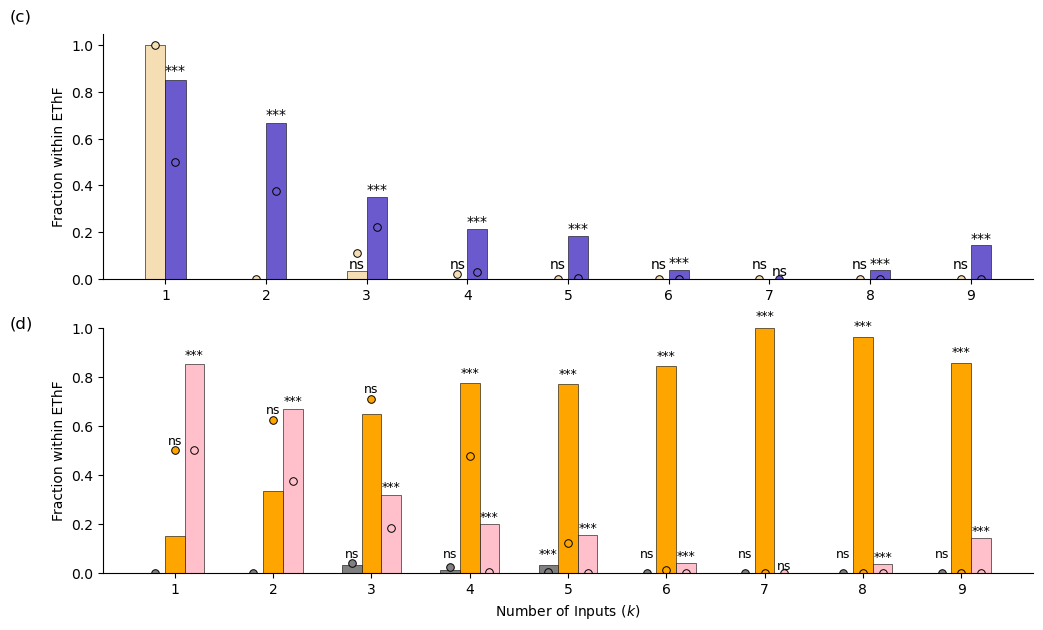

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(12, 7))
j=np.arange(1,10)
width=0.20

ax[0].bar(j-0.10,frac_ising_in_EThF[0:10],width,color='wheat',label=r'$IMR$',edgecolor='black',linewidth=0.4)
ax[0].scatter(j-0.10,theor_frac_ising_in_EThF[0:10],s=30, c='wheat',edgecolors='black',linewidths=0.7)

ax[0].bar(j+0.10,frac_bit_in_EThF[0:10],width,color='slateblue',label=r'$BMR$',edgecolor='black',linewidth=0.4)
ax[0].scatter(j+0.10,theor_frac_bit_in_EThF[0:10],s=30, c='slateblue',edgecolors='black',linewidths=0.7)

for k in j:
    a1 = df_empir.loc[df_empir['k']==k, 'ising'].values[0]
    b = df_empir.loc[df_empir['k']==k, 'EThF'].values[0]
    p1 = df_theo.loc[df_theo['Input']==k, 'frac_eff_ising_in_EThF'].values[0]
    a2 = df_empir.loc[df_empir['k']==k, 'bit'].values[0]
    p2 = df_theo.loc[df_theo['Input']==k, 'frac_eff_bit_based_in_EThF'].values[0]
    if k not in [1,2]:
        label1 = get_sig_label(a1, b, p1)
        ax[0].text(k - 0.10, 0.03, label1, ha='center', va='bottom', fontsize=10)
        
    label2 = get_sig_label(a2, b, p2)
    ax[0].text(k +0.10, max(a2/b, p2)*1.01, label2, ha='center', va='bottom', fontsize=10)


ax[0].set_xticks(np.arange(1,10))
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set_ylabel('Fraction within EThF')
ax[0].text(-0.1, 1.05, '(c)', transform=ax[0].transAxes, fontsize=12)


width_2 = 0.20
ax[1].bar(j-width_2,frac_non_NCF_bit_in_EThF[0:10],width_2,color='grey',label=r'$non-NCF ~BMRs$',edgecolor='black',linewidth=0.4)
ax[1].scatter(j-width_2,theor_frac_non_NCF_bit_in_EThF[0:10],s=30, c='grey',edgecolors='black',linewidths=0.7)

ax[1].bar(j,frac_non_bit_NCF_in_EThF[0:10],width_2,color='orange',label=r'$non-BMR ~NCFs$',edgecolor='black',linewidth=0.4)
ax[1].scatter(j,theor_frac_non_bit_NCF_in_EThF[0:10],s=30, c='orange',edgecolors='black',linewidths=0.7)

ax[1].bar(j+width_2,frac_bit_intersect_NCF_in_EThF[0:10],width_2,color='pink',label=r'$NCF-BMRs$',edgecolor='black',linewidth=0.4)
ax[1].scatter(j+width_2,theor_frac_NCF_intersect_bit_in_EThF[0:10],s=30, c='pink',edgecolors='black',linewidths=0.7)


for k in j:
    a1 = df_empir.loc[df_empir['k']==k, 'non_NCF_bit'].values[0]
    a2 = df_empir.loc[df_empir['k']==k, 'non_bit_NCF'].values[0]
    a3 = df_empir.loc[df_empir['k']==k, 'bit_intersect_NCF'].values[0]
    b = df_empir.loc[df_empir['k']==k, 'EThF'].values[0]
    p1 = df_theo.loc[df_theo['Input']==k, 'frac_non_NCF_bit_in_EThF'].values[0]
    p2 = df_theo.loc[df_theo['Input']==k, 'frac_non_bit_NCF_in_EThF'].values[0]
    p3 = df_theo.loc[df_theo['Input']==k, 'frac_NCF_intersect_bit_in_EThF'].values[0]
    
    if k not in [1,2]:
        label1 = get_sig_label(a1, b, p1)
        ax[1].text(k - width_2, 0.05, label1, ha='center', va='bottom', fontsize=9)
    label2 = get_sig_label(a2, b, p2)
    ax[1].text(k, max(a2/b, p2)*1.02, label2, ha='center', va='bottom', fontsize=9)
    label3 = get_sig_label(a3, b, p3)
    ax[1].text(k+width_2, max(a3/b, p3)*1.01, label3, ha='center', va='bottom', fontsize=9)
    
ax[1].set_xticks(np.arange(1,10))
ax[1].spines[['right', 'top']].set_visible(False)
ax[1].set_ylabel('Fraction within EThF')
ax[1].set_xticks(np.arange(1,10))
ax[1].set_xlabel('Number of Inputs 'r'$(k)$')
ax[1].set_ylim(0, 1)
ax[1].text(-0.1, -0.2, '(d)', transform=ax[0].transAxes, fontsize=12)
plt.show()

# (C) Harris dataset

In [11]:
df_theo =pd.read_csv('../input/Expected_fraction_data_EF.tsv', sep = '\t')
df_Harris = pd.read_csv('../input/Empirical_dataset/Harris_reference_data_for_thf_study.tsv', sep = '\t')
EThF_theo=list(df_theo['EThF'])
theor_frac_ising_in_EThF= list(df_theo['frac_eff_ising_in_EThF'])
theor_frac_bit_in_EThF=list(df_theo['frac_eff_bit_based_in_EThF'])
theor_frac_non_NCF_bit_in_EThF = list(df_theo['frac_non_NCF_bit_in_EThF'])
theor_frac_NCF_in_EthF=list(df_theo['frac_NCF_in_EThF'])
theor_frac_non_bit_NCF_in_EThF = list(df_theo['frac_non_bit_NCF_in_EThF'])
theor_frac_NCF_intersect_bit_in_EThF = list(df_theo['frac_NCF_intersect_bit_in_EThF'])

In [12]:
inputs=list(df_Harris['k'])
EThF=list(df_Harris['EThF'])
ising=list(df_Harris['ising'])
bit_based=list(df_Harris['bit_based'])
NCF=list(df_Harris['NCF'])
freq=list(df_Harris['nobs'])

In [13]:
count = [sum(freq[i] for i in range(len(inputs)) if inputs[i] == k) for k in range(1, 6)]
count_EThF = [sum(freq[i] for i in range(len(EThF)) if EThF[i] and inputs[i] == k) for k in range(1, 6)]
count_ising = [sum(freq[i] for i in range(len(ising)) if ising[i] and inputs[i] == k) for k in range(1, 6)]
count_bit = [sum(freq[i] for i in range(len(bit_based)) if bit_based[i] and inputs[i] == k) for k in range(1, 6)]
count_NCF = [sum(freq[i] for i in range(len(NCF)) if NCF[i] and inputs[i] == k) for k in range(1, 6)]
count_non_NCF_bit = [sum(freq[i] for i in range(len(bit_based)) if bit_based[i] and not NCF[i] and inputs[i] == k) for k in range(1, 6)]
count_non_bit_NCF = [sum(freq[i] for i in range(len(bit_based)) if not bit_based[i] and NCF[i] and inputs[i] == k) for k in range(1, 6)]
count_bit_intersect_NCF = [sum(freq[i] for i in range(len(bit_based)) if bit_based[i] and NCF[i] and inputs[i] == k) for k in range(1, 6)]


frac_EThF_theor=[EThF_theo[i]/2**(2**(i+1)) for i in range(len(EThF_theo))]
frac_EThF_emp=[count_EThF[i]/count[i] for i in range(len(count_EThF))]

y=count_EThF
x=count_ising
z=count_bit
w=count_NCF
q = count_non_NCF_bit
s = count_non_bit_NCF
u = count_bit_intersect_NCF


frac_NCF_in_EThF=[w[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]
frac_ising_in_EThF=[x[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]
frac_bit_in_EThF=[z[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]
frac_non_NCF_bit_in_EThF=[q[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]
frac_non_bit_NCF_in_EThF=[s[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]
frac_bit_intersect_NCF_in_EThF = [u[i]/y[i] if y[i] != 0 else 'EThF is 0'for i in range(len(y))]

In [14]:
def emp_num_frac_Harris():
    need_integer_values = ['k', 'All', 'EThF', 'NCF', 'ising', 'bit', 'non_NCF_ising', 'non_ising_NCF', 'ising_intersect_NCF', 'non_NCF_bit', 'non_bit_NCF', 'bit_intersect_NCF']
    empirical_data_file = {'k':list(set(inputs)), 'All': count, 'EThF': count_EThF, 'NCF': count_NCF, 'ising': count_ising, 'bit': count_bit, 
                          'non_NCF_bit': count_non_NCF_bit, 'non_bit_NCF': count_non_bit_NCF, 'bit_intersect_NCF': count_bit_intersect_NCF,
                          'NCF_frac_in_EThF': frac_NCF_in_EThF, 'ising_frac_in_EThF': frac_ising_in_EThF,'bit_frac_in_EThF': frac_bit_in_EThF, 
                          'non_NCF_bit_frac_in_EThF': frac_non_NCF_bit_in_EThF,
                          'non_bit_NCF_frac_in_EThF': frac_non_bit_NCF_in_EThF, 'bit_intersect_NCF_frac_in_EThF': frac_bit_intersect_NCF_in_EThF}
    empirical_data_file_new = {
    k: [int(x) for x in v] if k in need_integer_values else v
    for k, v in empirical_data_file.items()
    }

    df = pd.DataFrame(empirical_data_file_new)
    df.to_csv('../output/empirical_fraction_data_Harris.tsv', sep = '\t')
    return df

A = emp_num_frac_Harris()

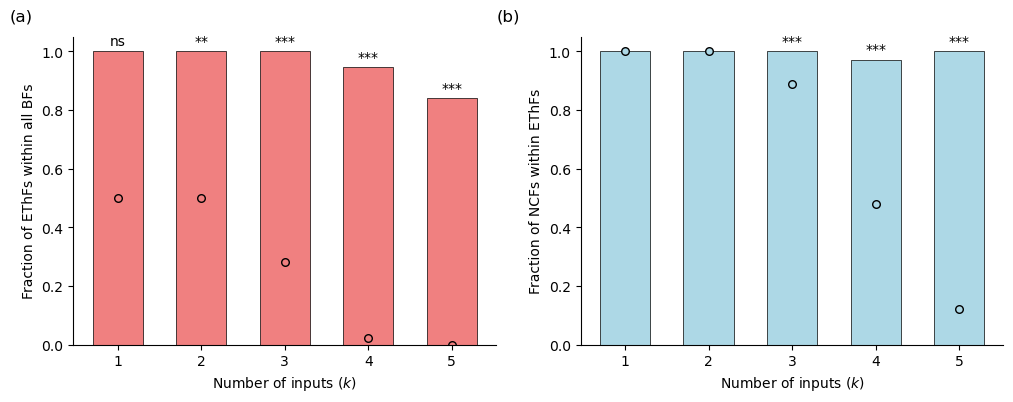

In [15]:
#------------------------------------------------------------------------------------------------------------------
# Plotting enrichment of EThFs in the Harris dataset
#------------------------------------------------------------------------------------------------------------------
df_theo = pd.read_csv('../input/Expected_fraction_data_EF.tsv', sep = '\t')
df_empir = pd.read_csv("../output/empirical_fraction_data_Harris.tsv", sep="\t")
inputs = [1,2,3,4,5]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns of plots

# Left subplot
ax[0].bar(inputs, frac_EThF_emp, color='lightcoral', label='Empirical', edgecolor='black', linewidth=0.5, width=0.6)
ax[0].scatter(inputs, frac_EThF_theor[:5], s=30, c='lightcoral', edgecolors='black',label='Theoretical')
ax[0].set_xlabel('Number of inputs ' r'$(k)$')
ax[0].set_ylabel('Fraction of EThFs within all BFs')
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set_xticks(inputs)
ax[0].text(-0.15, 1.05, '(a)', transform=ax[0].transAxes, fontsize=12)

for k in inputs:
    a = df_empir.loc[df_empir['k']==k, 'EThF'].values[0]
    b = df_empir.loc[df_empir['k']==k, 'All'].values[0]
    p = (df_theo.loc[df_theo['Input']==k, 'EThF'].values[0])/(2**(2**k))
    label = get_sig_label(a, b, p)
    ax[0].text(k, max(a/b,p)*1.01, label, ha='center', va='bottom', fontsize=10)

# Right subplot
ax[1].bar(inputs, frac_NCF_in_EThF, color='lightblue', label='Empirical', edgecolor='black', linewidth=0.5, width=0.6)
ax[1].scatter(inputs, theor_frac_NCF_in_EthF[:5], s=30, c='lightblue', edgecolors='black', label='Theoretical')
ax[1].set_xlabel('Number of inputs ' r'$(k)$')
ax[1].set_ylabel('Fraction of NCFs within EThFs')
ax[1].spines[['right', 'top']].set_visible(False)
ax[1].set_xticks(inputs)
ax[1].text(1, 1.05, '(b)', transform=ax[0].transAxes, fontsize=12)

for k in inputs:
    a = df_empir.loc[df_empir['k']==k, 'NCF'].values[0]
    b = df_empir.loc[df_empir['k']==k, 'EThF'].values[0]
    p = df_theo.loc[df_theo['Input']==k, 'frac_NCF_in_EThF'].values[0]
    label = get_sig_label(a, b, p)
    if k not in [1,2]:
        ax[1].text(k, max(a/b,p)*1.01, label, ha='center', va='bottom', fontsize=10)

plt.show()

Text(-0.1, -0.2, '(d)')

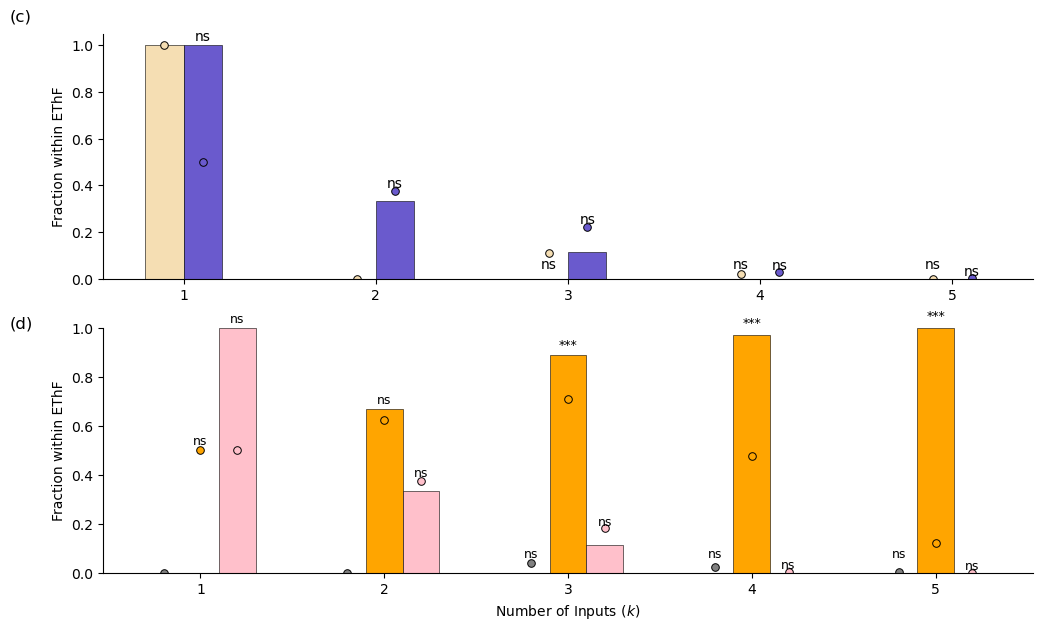

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(12, 7))  # 1 row, 2 columns of plots
j=np.arange(1,6)
width=0.20

ax[0].bar(j-0.10,frac_ising_in_EThF[0:5],width,color='wheat',label=r'$IMR$',edgecolor='black',linewidth=0.4)
ax[0].scatter(j-0.10,theor_frac_ising_in_EThF[0:5],s=30, c='wheat',edgecolors='black',linewidths=0.7)

ax[0].bar(j+0.10,frac_bit_in_EThF[0:5],width,color='slateblue',label=r'$BMR$',edgecolor='black',linewidth=0.4)
ax[0].scatter(j+0.10,theor_frac_bit_in_EThF[0:5],s=30, c='slateblue',edgecolors='black',linewidths=0.7)

for k in j:
    a1 = df_empir.loc[df_empir['k']==k, 'ising'].values[0]
    b = df_empir.loc[df_empir['k']==k, 'EThF'].values[0]
    p1 = df_theo.loc[df_theo['Input']==k, 'frac_eff_ising_in_EThF'].values[0]
    a2 = df_empir.loc[df_empir['k']==k, 'bit'].values[0]
    p2 = df_theo.loc[df_theo['Input']==k, 'frac_eff_bit_based_in_EThF'].values[0]
    if k not in [1,2]:
        label1 = get_sig_label(a1, b, p1)
        ax[0].text(k - 0.10, 0.03, label1, ha='center', va='bottom', fontsize=10)
        
    label2 = get_sig_label(a2, b, p2)
    ax[0].text(k +0.10, max(a2/b, p2)*1.01, label2, ha='center', va='bottom', fontsize=10)


ax[0].set_xticks(np.arange(1,6))
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set_ylabel('Fraction within EThF')
ax[0].text(-0.1, 1.05, '(c)', transform=ax[0].transAxes, fontsize=12)


width_2 = 0.20
ax[1].bar(j-width_2,frac_non_NCF_bit_in_EThF[0:5],width_2,color='grey',label=r'$non-NCF ~BMRs$',edgecolor='black',linewidth=0.4)
ax[1].scatter(j-width_2,theor_frac_non_NCF_bit_in_EThF[0:5],s=30, c='grey',edgecolors='black',linewidths=0.7)

ax[1].bar(j,frac_non_bit_NCF_in_EThF[0:5],width_2,color='orange',label=r'$non-BMR ~NCFs$',edgecolor='black',linewidth=0.4)
ax[1].scatter(j,theor_frac_non_bit_NCF_in_EThF[0:5],s=30, c='orange',edgecolors='black',linewidths=0.7)

ax[1].bar(j+width_2,frac_bit_intersect_NCF_in_EThF[0:5],width_2,color='pink',label=r'$NCF-BMRs$',edgecolor='black',linewidth=0.4)
ax[1].scatter(j+width_2,theor_frac_NCF_intersect_bit_in_EThF[0:5],s=30, c='pink',edgecolors='black',linewidths=0.7)


for k in j:
    a1 = df_empir.loc[df_empir['k']==k, 'non_NCF_bit'].values[0]
    a2 = df_empir.loc[df_empir['k']==k, 'non_bit_NCF'].values[0]
    a3 = df_empir.loc[df_empir['k']==k, 'bit_intersect_NCF'].values[0]
    b = df_empir.loc[df_empir['k']==k, 'EThF'].values[0]
    p1 = df_theo.loc[df_theo['Input']==k, 'frac_non_NCF_bit_in_EThF'].values[0]
    p2 = df_theo.loc[df_theo['Input']==k, 'frac_non_bit_NCF_in_EThF'].values[0]
    p3 = df_theo.loc[df_theo['Input']==k, 'frac_NCF_intersect_bit_in_EThF'].values[0]
    
    if k not in [1,2]:
        label1 = get_sig_label(a1, b, p1)
        ax[1].text(k - width_2, 0.05, label1, ha='center', va='bottom', fontsize=9)
    label2 = get_sig_label(a2, b, p2)
    ax[1].text(k, max(a2/b, p2)*1.02, label2, ha='center', va='bottom', fontsize=9)
    label3 = get_sig_label(a3, b, p3)
    ax[1].text(k+width_2, max(a3/b, p3)*1.01, label3, ha='center', va='bottom', fontsize=9)
    
ax[1].set_xticks(np.arange(1,6))
ax[1].spines[['right', 'top']].set_visible(False)
ax[1].set_ylabel('Fraction within EThF')
ax[1].set_xticks(np.arange(1,6))
ax[1].set_xlabel('Number of Inputs 'r'$(k)$')
ax[1].set_ylim(0, 1)
ax[1].text(-0.1, -0.2, '(d)', transform=ax[0].transAxes, fontsize=12)